In [4]:
# importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [5]:
# cargar los datos del conjunto de entrenamiento y el conjunto de validación
df_train_values = pd.read_csv("data/dataset_coches_train.csv")
df_test_values = pd.read_csv("data/dataset_coches_test.csv")

In [6]:
# Convierte las variables categóricas en variables numéricas con una codificación one-hot
df_train_val = pd.concat([df_train_values, df_test_values])

# Convierte la variable 'fecha' en una variable numérica que indique la antigüedad del coche en años
df_train_val['fecha'] = pd.to_datetime(df_train_val['fecha'])
df_train_val['antiguedad'] = (pd.to_datetime('today') - df_train_val['fecha']).dt.days / 365

# Convierte las variables categóricas 'marca' y 'tipo_cambio' en variables numéricas con una codificación one-hot
df_train_val = pd.get_dummies(df_train_val, columns=['marca', 'modelo','tipo_cambio','tipo_combustible'])

# Elimina las filas con valores nulos
df_train_val = df_train_val.dropna()

# Elimina la columna 'ID' y la columna 'fecha' original
df_train_val = df_train_val.drop(columns=['ID', 'fecha'])

# Separa el conjunto de datos de entrenamiento y el conjunto de datos de validación
df_train = df_train_val.iloc[:len(df_train_values)]
df_test = df_train_val.iloc[len(df_train_values):]

In [7]:
# Selecciona las características y la variable objetivo
X_train = df_train.drop(columns='precio')
y_train = df_train['precio']
X_test = df_test.drop(columns='precio')
y_test = df_test['precio']

In [8]:
# Divide el conjunto de entrenamiento en dos subconjuntos, uno para entrenamiento y otro para validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# Elegir y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Evaluar el modelo en el conjunto de validación
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)

print(f"R2 en el conjunto de validación: {r2:.2f}")

R2 en el conjunto de validación: 0.95


In [11]:
# Si el R2 es mayor que 0.9, consideramos que el modelo es satisfactorio
if r2 > 0.9:
    # Evaluar el modelo en el conjunto de test
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"R2 en el conjunto de test: {r2_test:.2f}")
else:
    print("El modelo no es satisfactorio")

R2 en el conjunto de test: 0.94


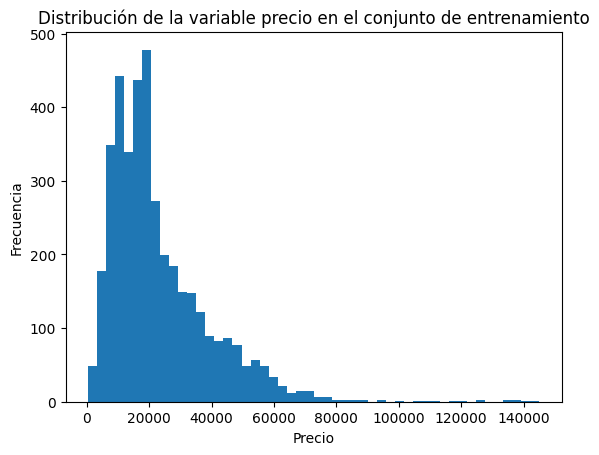

In [12]:
# representar gráficamente la distribución de la variable precio en el conjunto de entrenamiento
plt.hist(y_train, bins=50)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable precio en el conjunto de entrenamiento")
plt.show()

In [13]:
#Calcula el precio promedio de cada marca
precios_por_marca = df_train_values.groupby(['marca']).mean()['precio']

# Ordena el resultado por precio
precios_por_marca = precios_por_marca.sort_values(ascending=False)

# Selecciona la marca con el precio más alto y más bajo
marca_mas_cara = precios_por_marca.index[0]
marca_mas_barata = precios_por_marca.index[-1]

print(f'La marca más cara es {marca_mas_cara} y la marca más barata es {marca_mas_barata}.')

La marca más cara es audi y la marca más barata es vauxhall.


C:\Users\aitor.llanos\AppData\Local\Temp\ipykernel_21472\1852630209.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precios_por_marca = df_train_values.groupby(['marca']).mean()['precio']


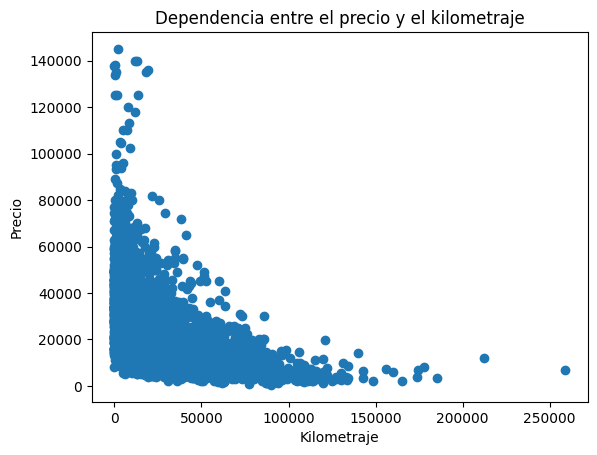

In [14]:
# representar gráficamente la dependencia entre el precio y el kilometraje
plt.scatter(df_train["total_km"], df_train["precio"])
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.title("Dependencia entre el precio y el kilometraje")
plt.show()

In [15]:
#cálculo de las variables más significativas
coefs = model.feature_importances_
sorted_coefs = sorted(zip(X_train.columns, coefs), key=lambda x: x[1], reverse=True)
print("Variables más significativas:")
for var, coef in sorted_coefs:
    print(f"{var}: {coef:.2f}")

Variables más significativas:
tipo_motor: 0.45
total_km: 0.28
consumo: 0.08
modelo_ R8: 0.03
tasa: 0.03
modelo_ i8: 0.01
marca_merc: 0.01
tipo_cambio_Manual: 0.01
modelo_ V Class: 0.01
modelo_ S Class: 0.01
modelo_ Caravelle: 0.01
modelo_ G Class: 0.01
marca_audi: 0.01
modelo_ California: 0.01
modelo_ X7: 0.00
modelo_ 8 Series: 0.00
marca_ford: 0.00
modelo_ Mustang: 0.00
marca_bmw: 0.00
tipo_combustible_Petrol: 0.00
modelo_ KA: 0.00
marca_vw: 0.00
modelo_ X6: 0.00
modelo_ GLS Class: 0.00
modelo_ RS6: 0.00
tipo_cambio_Semi-Auto: 0.00
modelo_ M4: 0.00
tipo_cambio_Automatic: 0.00
tipo_combustible_Diesel: 0.00
modelo_ RS3: 0.00
modelo_ 7 Series: 0.00
modelo_ M5: 0.00
modelo_ Amarok: 0.00
modelo_ Prius: 0.00
modelo_ X4: 0.00
modelo_ SQ7: 0.00
modelo_ Arteon: 0.00
modelo_ IX20: 0.00
modelo_ SLK: 0.00
modelo_ Scirocco: 0.00
modelo_ GL Class: 0.00
modelo_ Puma: 0.00
modelo_ 6 Series: 0.00
marca_toyota: 0.00
tipo_combustible_Hybrid: 0.00
modelo_ CLS Class: 0.00
modelo_ A8: 0.00
modelo_ i3: 0.00

In [24]:
# Obtener la lista de columnas en las que se entrenó el modelo
columns = list(X_train.columns)
print(columns)

# Crear un nuevo dataframe con los valores para el Audi A7
df = pd.DataFrame({
    'antiguedad': [0],# Es nuevo
    'km': [5000], 
    'consumo': [5.5],
    'motor': [4.0], #
    'tasa_circulacion': [200], 
    'marca_audi': [1], 
    'modelo_A7': [1], 
    'tipo_cambio_automático': [1], 
    'tipo_combustible_híbrido': [1], 
}, columns=columns)
price = model.predict(df)[0]
print(f"El precio predecido para el Audi A7: {price:.2f}€")

['total_km', 'consumo', 'tipo_motor', 'tasa', 'antiguedad', 'marca_audi', 'marca_bmw', 'marca_ford', 'marca_hyundi', 'marca_merc', 'marca_skoda', 'marca_toyota', 'marca_vauxhall', 'marca_vw', 'modelo_ 6 Series', 'modelo_ 7 Series', 'modelo_ 8 Series', 'modelo_ A7', 'modelo_ A8', 'modelo_ Agila', 'modelo_ Amarok', 'modelo_ Antara', 'modelo_ Arteon', 'modelo_ Avensis', 'modelo_ Beetle', 'modelo_ CC', 'modelo_ CLA Class', 'modelo_ CLK', 'modelo_ CLS Class', 'modelo_ Caddy', 'modelo_ Caddy Life', 'modelo_ Caddy Maxi Life', 'modelo_ California', 'modelo_ Camry', 'modelo_ Caravelle', 'modelo_ Combo Life', 'modelo_ Edge', 'modelo_ Eos', 'modelo_ Fusion', 'modelo_ G Class', 'modelo_ GL Class', 'modelo_ GLB Class', 'modelo_ GLS Class', 'modelo_ GT86', 'modelo_ GTC', 'modelo_ Galaxy', 'modelo_ Getz', 'modelo_ Grand C-MAX', 'modelo_ Grand Tourneo Connect', 'modelo_ Hilux', 'modelo_ I40', 'modelo_ I800', 'modelo_ IQ', 'modelo_ IX20', 'modelo_ IX35', 'modelo_ Jetta', 'modelo_ KA', 'modelo_ Kamiq', 

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- antiguedad
Feature names seen at fit time, yet now missing:
- ID
- fecha
- modelo_A7
